# Boundaries of the Arctic Ocean

According to the description in https://legacy.iho.int/mtg_docs/com_wg/S-23WG/S-23WG_Misc/Draft_2002/Draft_2002.htm

In [1]:
import numpy as np

from matplotlib import pyplot as plt
import cartopy

from shapely.geometry import Point, MultiPoint, LinearRing
from shapely.geometry.polygon import Polygon

import global_land_mask

## Border definition

Border of the Artic Ocean according to [1]. 

- Poluostrov Chukotskiy at position 66°22'N – 170°35'W (Siberia), from there along the coasts of Russia and Norway, to
- the southwestern coast of Norway, at position  60°51'N - 4°40'E;
- Muckle Flugga (60°51'N – 0°53'W)
- the northern  extremity of Fuglöy (62°21'N – 6°15'W), in the Føroyar
- to Stokksnes  (64°14'N – 14°58'W), on the eastern coast of Iceland, from there along the coast of Iceland,
- Bjargtangar (65°30'N – 24°32'W), the western extremity of this island;
- Kap Edward Holm (67°51'N – 32°11'W), an island close off the southeastern coast of Greenland; along the coast of Greenland, 
- S-W Greenland Coast, (60°00'- 44°50'W)
- coast of Labrador, Canada, at position 60°00’N - 64°10'W; along the northern coast of North America,
- to the coast of the Seward Peninsula in Alaska, at position 66°11'N – 164°14'W
- back to the coast of Poluostrov Chukotskiy at position 66°22'N – 170°35'W) 

Assuming the data points to be given with longitudes between -180 and +180 degrees, these are the coordinates of the defined points:

In [2]:
chukotskiy = Point([-(170 + 35/60), 66 + 22/60]) 
norway_sw  = Point([4 + 40/60, 60 + 51/60]) 
muckle_flugga   = Point([-53/60, 60+51/60])
fugloy   = Point([-6-15/60, 62+21/60])
iceland_stokksnes = Point([-14-58/60, 64+14/60])
iceland_bjargtangar = Point([-24-32/60, 65+30/60])
greenland_kap = Point([-32-11/60, 67+51/60])
greenland_sw = Point([-44-50/60, 60])
canada_labrador = Point([-64-10/60, 60])
alaska_seward = Point([-164-14/60, 66+11/60])

In [3]:
all_points = MultiPoint([norway_sw, muckle_flugga, fugloy, iceland_stokksnes, iceland_bjargtangar, greenland_kap, greenland_sw, canada_labrador, alaska_seward, chukotskiy])

Visualize the points on a map in north polar stereo projection

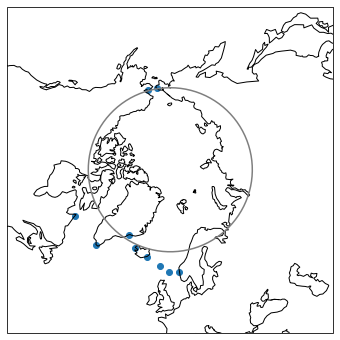

In [4]:
fig=plt.figure(figsize=(18, 6))
ax = plt.axes(projection=cartopy.crs.NorthPolarStereo())
ax.coastlines()

# extract the x and y coordinates of the defined points
xx = []
yy = []

for g in all_points.geoms:
    xx.append(g.x)
    yy.append(g.y)


ax.scatter(xx, yy, transform=cartopy.crs.PlateCarree(), color='C0')

# polar circle
ax.plot(np.linspace(-180, 180, 100), np.repeat(66.5, 100), color='C7', transform=cartopy.crs.PlateCarree())


ax.set_extent([-180, 180, 45, 90], cartopy.crs.PlateCarree())
plt.show()

## Polygon representing the ocean

### First attempt

Define a polygon by the fixed points. Note this does not fill the area as we would assume, because the date boundary (dashed line) runs right through the polygon area.

<ipython-input-5-0f4d003ae763>:6: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arctic_linring = LinearRing(all_points)
/home/k/k202141/.conda/envs/cygnss-d/lib/python3.9/site-packages/shapely/geometry/polygon.py:54: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  ret = geos_linearring_from_py(coordinates)


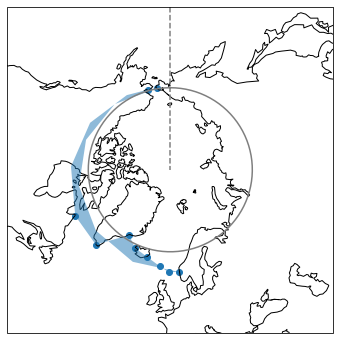

In [5]:
fig=plt.figure(figsize=(18, 6))
ax = plt.axes(projection=cartopy.crs.NorthPolarStereo())
ax.coastlines()


arctic_linring = LinearRing(all_points)

arctic_ocean_boundary = Polygon(arctic_linring)
ax.scatter(xx, yy, transform=cartopy.crs.PlateCarree(), color='C0')
ax.plot(-180, 90, -180, 20, transform=cartopy.crs.PlateCarree())
ax.add_geometries(arctic_ocean_boundary, crs=cartopy.crs.PlateCarree(), alpha=0.5)

# polar circle
ax.plot(np.linspace(-180, 180, 100), np.repeat(66.5, 100), color='C7', transform=cartopy.crs.PlateCarree())
# date line
ax.plot(np.repeat(180, 100), np.linspace(20, 90, 100), color='C7', linestyle='--', transform=cartopy.crs.PlateCarree())

ax.set_extent([-180, 180, 45, 90], cartopy.crs.PlateCarree())
plt.show()

## Second attempt

We define support points in-land that help to obtain the correct shape of the polygon. We define the North Pole as support points, coming from the East as well as from the West direction. This generates the correct polygon. Land points can be excluded with the help of e.g. `global_land_mask.is_ocean()`

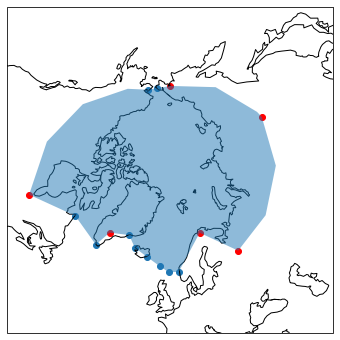

In [6]:
fig=plt.figure(figsize=(18, 6))
ax = plt.axes(projection=cartopy.crs.NorthPolarStereo())
ax.coastlines()

sp1 = [25, 70] # norway
sp2 = [40, 60] # russia
sp3 = [120, 60] # russia
sp4 = [180, 66] # siberia
sp5 = [-44, 65] # greenland
sp6 = [-80, 50] # hudson bay
sp7 = [-180, 66] # alaska

np_e = [180, 90] # north pole (from east)
np_w = [-180, 90] # north pole (from west)

ax.scatter(sp1[0], sp1[1], color='red', transform=cartopy.crs.PlateCarree())
ax.scatter(sp2[0], sp2[1], color='red', transform=cartopy.crs.PlateCarree())
ax.scatter(sp4[0], sp4[1], color='red', transform=cartopy.crs.PlateCarree())
ax.scatter(sp3[0], sp3[1], color='red', transform=cartopy.crs.PlateCarree())
ax.scatter(sp5[0], sp5[1], color='red', transform=cartopy.crs.PlateCarree())
ax.scatter(sp6[0], sp6[1], color='red', transform=cartopy.crs.PlateCarree())


arctic_linring = LinearRing((np_e, sp4, sp3, sp2, sp1, norway_sw, muckle_flugga, fugloy, iceland_stokksnes, iceland_bjargtangar, greenland_kap, sp5, greenland_sw, canada_labrador, sp6, alaska_seward, chukotskiy, sp7, np_w))

arctic_ocean_boundary = Polygon(arctic_linring)

ax.scatter(xx, yy, transform=cartopy.crs.PlateCarree(), color='C0')

ax.add_geometries(arctic_ocean_boundary, crs=cartopy.crs.PlateCarree(), alpha=0.5)

ax.set_extent([-180, 180, 45, 90], cartopy.crs.PlateCarree())
plt.show()

## Third attempt

Retrieve the coastlines so we can avoid using the support points (TODO).

## Use of the Polygon

Check if a given point is inside the polygon

In [7]:
test_point_1 = Point((120, 80)) # Within the Arctic ocean
test_point_2 = Point((5, 55))   # Not within the Arctic ocean
test_point_3 = Point((100, 70)) # Within the polygon, but on land

Global land mask requires (lat, lon) input

In [8]:
assert global_land_mask.is_ocean(test_point_1.y, test_point_1.x) & test_point_1.within(arctic_ocean_boundary)

In [9]:
assert not (global_land_mask.is_ocean(test_point_2.y, test_point_2.x) & test_point_2.within(arctic_ocean_boundary))

In [10]:
assert not (global_land_mask.is_ocean(test_point_3.y, test_point_3.x) & test_point_3.within(arctic_ocean_boundary))

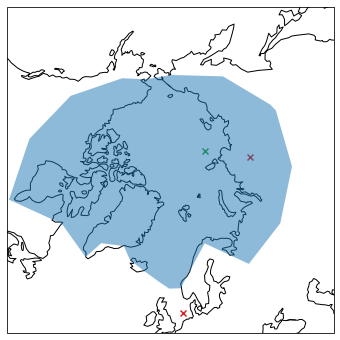

In [11]:
fig=plt.figure(figsize=(18, 6))
ax = plt.axes(projection=cartopy.crs.NorthPolarStereo())
ax.coastlines()

ax.scatter(test_point_1.x, test_point_1.y, marker='x', color='C2', transform=cartopy.crs.PlateCarree())
ax.scatter(test_point_2.x, test_point_2.y, marker='x', color='C3', transform=cartopy.crs.PlateCarree())
ax.scatter(test_point_3.x, test_point_3.y, marker='x', color='C3', transform=cartopy.crs.PlateCarree())
ax.add_geometries(arctic_ocean_boundary, crs=cartopy.crs.PlateCarree(), alpha=0.5)

ax.set_extent([-180, 180, 50, 90], cartopy.crs.PlateCarree())
plt.show()

## In other map projections

### PlateCarree

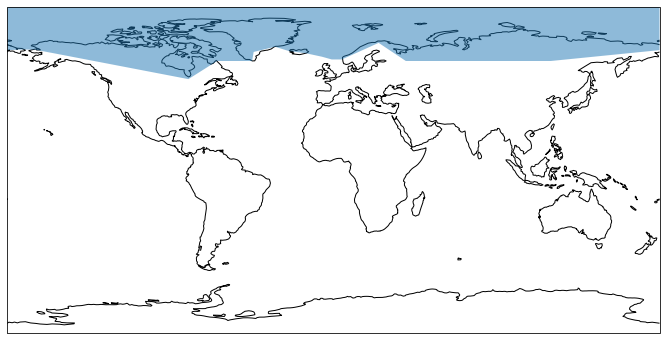

In [12]:
fig=plt.figure(figsize=(18, 6))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.coastlines()

ax.add_geometries(arctic_ocean_boundary, crs=cartopy.crs.PlateCarree(), alpha=0.5)

ax.set_extent([-180, 180, -90, 90], cartopy.crs.PlateCarree())
plt.show()

### Orthographic

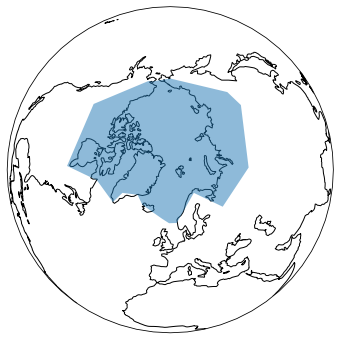

In [13]:
fig=plt.figure(figsize=(18, 6))
ax = plt.axes(projection=cartopy.crs.Orthographic(central_latitude=80))
ax.coastlines()

ax.add_geometries(arctic_ocean_boundary, crs=cartopy.crs.PlateCarree(), alpha=0.5)

#ax.set_extent([-180, 180, -90, 90], cartopy.crs.PlateCarree())
plt.show()